In [ ]:
#required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import chardet
import datetime

import seaborn as sns

from sklearn.feature_selection import VarianceThreshold

color = sns.color_palette()

%matplotlib inline

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [ ]:
census_tract_df = pd.read_csv('../data/denver_census_tract_data.csv')
# Remove null columns
num_census = census_tract_df.shape[0]
census_tract_df = census_tract_df.dropna(axis=1, thresh=int(num_census*0.9))

In [ ]:
# Remove low variance columns
selector = VarianceThreshold(threshold=0.1)
selector.fit_transform(census_tract_df)

array([[8.0010078e+09, 1.3160000e+03, 6.0248840e+00, ..., 2.2800000e+01,
        4.3500000e+01, 1.7300000e+05],
       [8.0010078e+09, 1.2390000e+03, 9.1875870e+00, ..., 1.6100000e+01,
        4.9800000e+01, 2.5660000e+05],
       [8.0010079e+09, 1.4820000e+03, 1.0041348e+01, ..., 1.4900000e+01,
        4.6500000e+01, 1.7400000e+05],
       ...,
       [8.1230023e+09, 1.3490000e+03, 4.5391860e+00, ..., 1.4400000e+01,
        2.4300000e+01, 2.6860000e+05],
       [8.1230025e+09, 1.1840000e+03, 4.3252440e+00, ..., 1.4200000e+01,
        2.1300000e+01, 2.8960000e+05],
       [8.1230025e+09, 1.5380000e+03, 5.2797940e+00, ..., 1.5800000e+01,
        2.4500000e+01, 2.9260000e+05]])

In [ ]:
print(len(census_tract_df.columns))

112


In [ ]:
census_tract_df['built 1995 or later']

0      13.033873
1       1.555412
2       2.570440
3       0.767123
4      86.148238
         ...    
750    40.666667
751    55.253283
752    22.450889
753    29.472735
754    31.200665
Name: built 1995 or later, Length: 755, dtype: float64

In [ ]:
census_tract_df['national_percentile_total_achievement_sd'].describe()

count    755.000000
mean      67.356695
std       22.703895
min       10.835699
25%       53.547777
50%       81.103753
75%       83.524124
max       93.396405
Name: national_percentile_total_achievement_sd, dtype: float64

<AxesSubplot:xlabel='national_percentile_total_achievement_sd', ylabel='Count'>

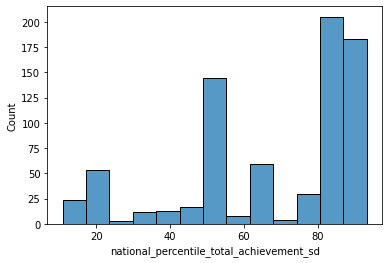

In [ ]:
sns.histplot(census_tract_df['national_percentile_total_achievement_sd'])

<AxesSubplot:xlabel='national_percentile_total_achievement_sc', ylabel='Count'>

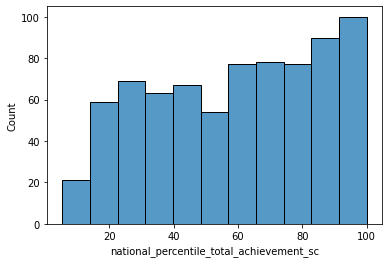

In [ ]:
sns.histplot(census_tract_df['national_percentile_total_achievement_sc'])

In [ ]:
census_tract_df['census_population'].describe()

count      755.000000
mean      4695.504636
std       1939.577669
min        779.000000
25%       3381.000000
50%       4469.000000
75%       5694.500000
max      16569.000000
Name: census_population, dtype: float64

In [ ]:
for feature in census_tract_df:
    print(feature)

ct_key
median_rental_price
average_annual_rent_as_percentage_of_property_value
farm_score
pop_density
densely_urban_score
urban_score
suburban_score
rural_score
remote_score
built 1995 or later
built 1970-1994
built 1940-1969
built before 1940
single_family_detached_pct
rowhouses_and_attached_homes_pct
small_apt_buildings_pct
complexes/high_rise_apt_pct
mobile_home_pct
0_bedroom_pct
1_bedroom_pct
2_bedroom_pct
3_bedroom_pct
4_bedroom_pct
5_bedroom_pct
homeownership_rate
rental_rate
seasonal_housing_pct
vacant_homes_pct
family_friendly_score
first_time_homebuyer_score
luxury_communities_score
retirement_friendly_score
young_single_professional_score
college_student_friendly_score
commute_under_15_min_pct
commute_15-30_min_pct
commute_30-45_min_pct
commute_45-60_min_pct
commute_over_60_min_pct
violent_crime_rate
property_crime_rate
standardized_test_score_percentile
pct_pop_at_least_college_degree
children_poverty_pct
student_to_teacher_ratio_sd
state_index_total_achievement_sd
national_

In [ ]:
features_chosen = ['ct_key', 'median_rental_price',
'average_annual_rent_as_percentage_of_property_value',
'farm_score','pop_density','urban_score','rural_score','built 1995 or later',
'built 1970-1994','built 1940-1969','built before 1940',
'single_family_detached_pct',
'rowhouses_and_attached_homes_pct','small_apt_buildings_pct',
'complexes/high_rise_apt_pct','mobile_home_pct', 'rental_rate',
'seasonal_housing_pct','vacant_homes_pct',
'family_friendly_score','first_time_homebuyer_score','luxury_communities_score',
'retirement_friendly_score','young_single_professional_score',
'college_student_friendly_score','property_crime_rate',
'standardized_test_score_percentile','pct_pop_at_least_college_degree',
'children_poverty_pct', 
'Hispanic', 'White', 'Black', 'Asian', 'annual_births_per_resident',
'workforce_fraction','public_transportation', 'mean_household_income',
'avg_household_size',
'percent_mortgage',
'built 2014 or later',
'built 2010-2013',
'built 2000-2009', '<18']

#commute scores compile together in some way
#ask on slack difference between sc & sd
#combine age ranges
#for racial groups
#we dropped changing population size per ct which may be useful for future

In [ ]:
X = census_tract_df[features_chosen].copy()

In [ ]:
X['commute_under_30'] = census_tract_df['commute_under_15_min_pct'] + census_tract_df['commute_15-30_min_pct']
X['18-59'] = census_tract_df['18-24'] + census_tract_df['25-34'] + census_tract_df['35-49'] + census_tract_df['50-59']

In [ ]:
X.columns

Index(['ct_key', 'median_rental_price',
       'average_annual_rent_as_percentage_of_property_value', 'farm_score',
       'pop_density', 'urban_score', 'rural_score', 'built 1995 or later',
       'built 1970-1994', 'built 1940-1969', 'built before 1940',
       'single_family_detached_pct', 'rowhouses_and_attached_homes_pct',
       'small_apt_buildings_pct', 'complexes/high_rise_apt_pct',
       'mobile_home_pct', 'rental_rate', 'seasonal_housing_pct',
       'vacant_homes_pct', 'family_friendly_score',
       'first_time_homebuyer_score', 'luxury_communities_score',
       'retirement_friendly_score', 'young_single_professional_score',
       'college_student_friendly_score', 'property_crime_rate',
       'standardized_test_score_percentile', 'pct_pop_at_least_college_degree',
       'children_poverty_pct', 'Hispanic', 'White', 'Black', 'Asian',
       'annual_births_per_resident', 'workforce_fraction',
       'public_transportation', 'mean_household_income', 'avg_household_size',


In [ ]:
census_tract_df['<200k'] + census_tract_df['200-300k']

0      0.859813
1      1.000000
2      0.808411
3      0.890000
4      1.000000
         ...   
750    0.205722
751    0.342180
752    0.543210
753    0.516798
754    0.497006
Length: 755, dtype: float64

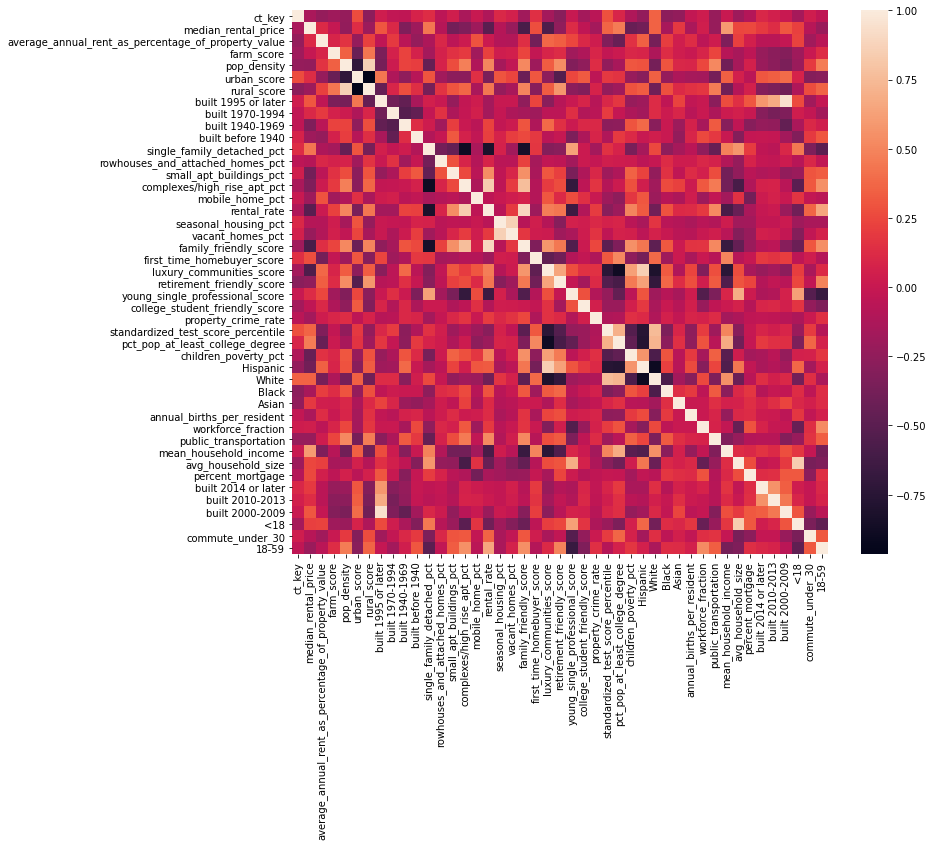

In [ ]:
corr = X.corr()
f, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
X.head()

,ct_key,median_rental_price,average_annual_rent_as_percentage_of_property_value,farm_score,pop_density,urban_score,rural_score,built 1995 or later,built 1970-1994,built 1940-1969,...,public_transportation,mean_household_income,avg_household_size,percent_mortgage,built 2014 or later,built 2010-2013,built 2000-2009,<18,commute_under_30,18-59
0,8001007801,1316.0,6.024884,100.0,15066.473217,10.0,83.0,13.033873,45.729013,36.745214,...,0.204571,42004,3.18,0.803738,0.000000,0.000000,0.130339,0.335992,60.944700,0.557892
1,8001007802,1239.0,9.187587,100.0,15270.696288,10.0,83.0,1.555412,53.856124,43.097861,...,0.160594,41771,3.21,0.724409,0.000000,0.000000,0.015554,0.286878,55.582407,0.630360
2,8001007900,1482.0,10.041348,100.0,8644.378631,6.0,76.0,2.570440,39.001483,49.085517,...,0.090175,48359,2.98,0.860395,0.002966,0.014829,0.007909,0.294159,58.484525,0.633533
3,8001008000,1499.0,7.532211,100.0,7448.779496,3.0,73.0,0.767123,23.342466,73.643836,...,0.078283,60798,3.51,0.757377,0.003836,0.000000,0.003836,0.331037,47.678703,0.548310
4,8001008100,2203.0,10.072085,100.0,820.952275,51.0,19.0,86.148238,12.758202,1.093560,...,0.010554,61814,1.77,0.269231,0.063183,0.290401,0.507898,0.075410,73.745174,0.785574


In [ ]:
X.to_csv('../data/census_tract_reduced.csv')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1c850c61-d934-4c85-b16d-3cb283df0c84' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>